In [1]:
from tools import Preprocessing, Clustering, bench_clustering

import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import hdbscan

from scipy.cluster import hierarchy


from fancyimpute import KNN
from fancyimpute import MICE
from fancyimpute.bayesian_ridge_regression import BayesianRidgeRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 10000)

Using TensorFlow backend.
/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# import the csv dataset as a pandas DataFrame
df = pd.read_csv('data/full_data.csv')
#df.columns

In [3]:
# list(df.columns)

**Indirect effects** occur to industries in the backward­linked industries that supply the exporting firm. [Wayne P. Miller]

Il valore dei moltiplicatori d'impatto indiretto dipende da:
 - Sviluppo del settore petrolifero, che incide sulla disponibilità di suppliers specializzati
     - Produzione di petrolio (bdp)
     - Produzione di petrolio (bdp)/GDP(US$)? In realtà, ciò che ci interessa è il valore assoluto della produzione, non relativo alla ricchezza totale del paese.
     - Numero di siti di estrazione?
 - Sviluppo industriale di un paese. (I suppliers avranno bisogno di materie prime, lavorazioni di vario genere, trasporti etc.)
 - Livello di importazione: più un paese è propenso all'importazione, meno la spesa dei suppliers sarà rivolta internamente al paese.


In [4]:
varlist = [
    'ImportGoodsServices_%GDP_AVERAGE',
#     'Production_Oil_bpd_2014',
#     'Production_Oil_bpd_2015',
    'Production_Oil_bpd_2016',
    'MVApc_constantUS$_2015',
#   'MHMVAsh%_2015',
    'MVAsh%_2015',
          ]

In [5]:
prep = Preprocessing('data/full_data.csv',
                     varlist=varlist, verbose=False)
prep.export_csv('data/cleaned_data_petroleum.csv', impute=True)

Imputing row 1/37 with 0 missing, elapsed time: 0.003


/home/lupol/dev/clustering-economies/tools.py:85: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.country_names = self.df['Country Name'].as_matrix()
/home/lupol/dev/clustering-economies/tools.py:86: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  df_numeric = self.df.select_dtypes(include=[np.float64]).as_matrix()


In [6]:
# prep.df

/home/lupol/dev/clustering-economies/tools.py:112: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.country_names = self.df['Country Name'].as_matrix()


The imported dataset as the following characteristics:
<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, DZA to VNM
Columns: 4 entries, ImportGoodsServices_%GDP_AVERAGE to MVAsh%_2015
dtypes: float64(4)
memory usage: 1.4+ KB
None
CUMULATIVE PROPORTION OF VARIANCE EXPLAINED BY PCs


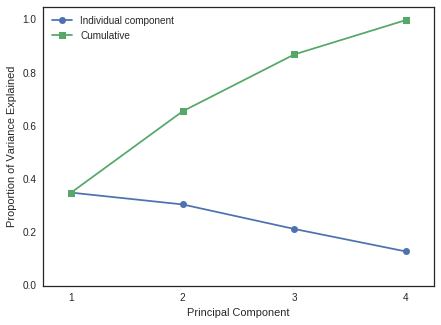

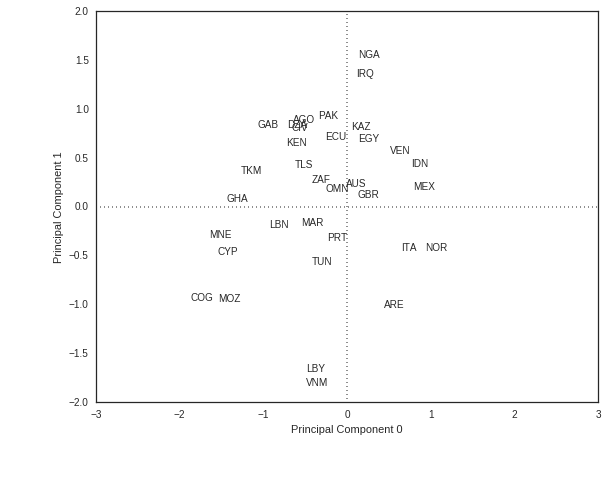

In [7]:
data = Clustering('data/cleaned_data_petroleum.csv')
data.get_PC()
data.plot_along_PC(pc1=0, pc2=1, xlim=[-3, 3], ylim=[-2, 2])

Hierarchical clustering with euclidean distance metric.


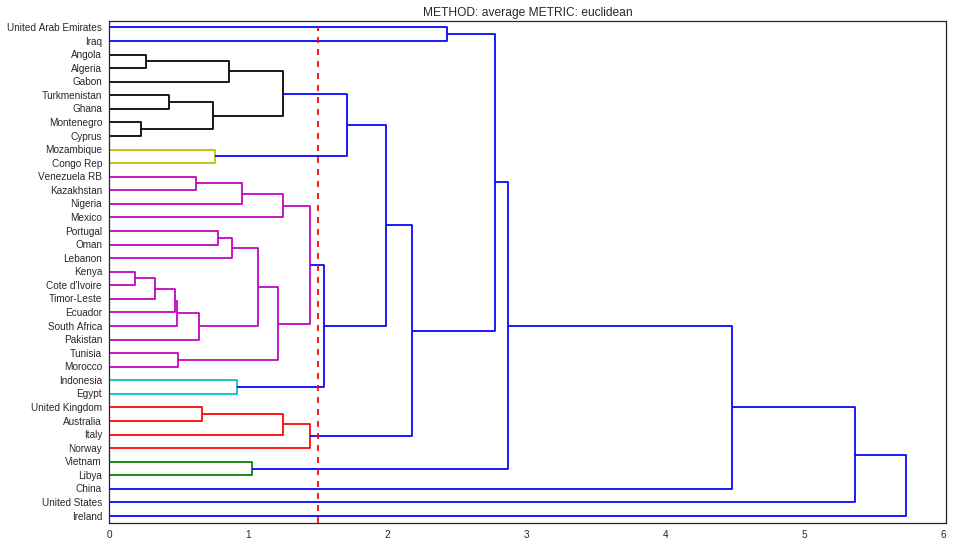

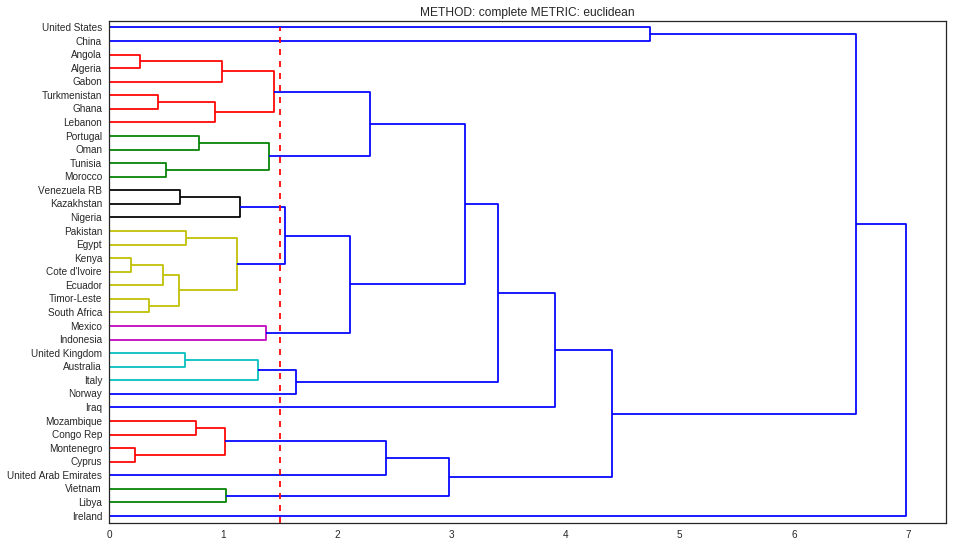

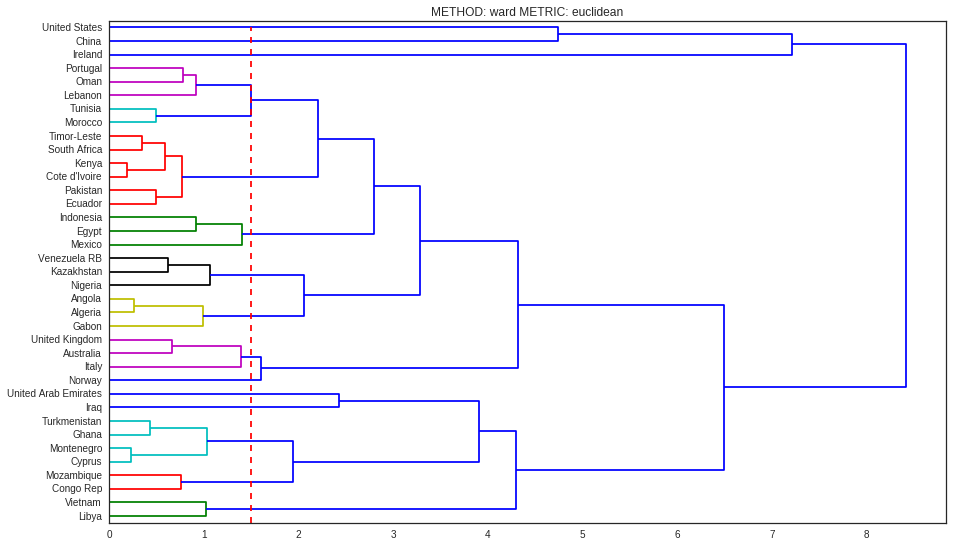

In [8]:
data.hierarchical_clustering(metric='euclidean', method=['average', 'complete', 'ward'], threshold=1.5, on_PC=0)

In [9]:
data.clusterings['hierarchical_complete_euclidean']

,
Cluster,
1,"[Libya, Vietnam]"
2,"[Congo Rep, Cyprus, Montenegro, Mozambique]"
3,[United Arab Emirates]
4,"[Australia, Italy, United Kingdom]"
5,[Norway]
6,"[Indonesia, Mexico]"
7,"[Cote d'Ivoire, Ecuador, Egypt, Kenya, Pakistan, South Africa, Timor-Leste]"
8,"[Kazakhstan, Nigeria, Venezuela RB]"
9,"[Morocco, Oman, Portugal, Tunisia]"


In [10]:
data.hdbscan(min_cluster_size=2, on_PC=0)
data.clusterings['hdbscan']

,
Cluster,
0,"[Cote d'Ivoire, Ecuador, Egypt, Kazakhstan, Kenya, Morocco, Oman, Pakistan, Portugal, South Africa, Timor-Leste, Venezuela RB]"
1,"[Algeria, Gabon]"
2,"[Cyprus, Ghana, Montenegro, Turkmenistan]"
-1,"[Angola, Australia, China, Congo Rep, Indonesia, Iraq, Ireland, Italy, Lebanon, Libya, Mexico, Mozambique, Nigeria, Norway, Tunisia, United Arab Emirates, United Kingdom, United States, Vietnam]"


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


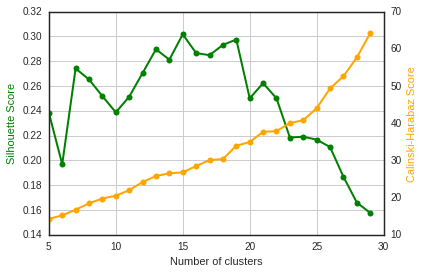

In [19]:
k_min = 5
k_max = 30
silh, calha = data.multipleK_means(k_min=5, k_max=30, on_PC=0, n_init=50)

In [20]:
best = 15
silh[best-k_min]

0.3016637472165318

In [22]:
nc = 13
data.kmeans(n_clusters=nc, on_PC=0)
data.clusterings['kmeans'+str(nc)]

,
Cluster,
0,[Ireland]
1,"[Kazakhstan, Mexico, Nigeria, Oman, Venezuela RB]"
2,"[Libya, Vietnam]"
3,[United States]
4,"[Congo Rep, Cyprus, Ghana, Montenegro, Mozambique]"
5,[China]
6,"[Australia, Italy, Norway, United Kingdom]"
7,"[Cote d'Ivoire, Ecuador, Kenya, Pakistan, South Africa, Timor-Leste]"
8,[United Arab Emirates]
